In [4]:
# módulos
import numpy as np
import pandas as pd
import sympy as sp

# dados
df_dados_paises = pd.read_csv('dados_1997_2011_paises_csv.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [5]:
# estatísticas descritivas
df_dados_paises.groupby('pais') \
               .agg(min_idh = pd.NamedAgg('idh', 'min'),
                    max_idh = pd.NamedAgg('idh', 'max'),
                    media_idh = pd.NamedAgg('idh', 'mean'),
                    mediana_idh = pd.NamedAgg('idh', 'median'),
                    desvio_padrao_idh = pd.NamedAgg('idh', 'std'))

,min_idh,max_idh,media_idh,mediana_idh,desvio_padrao_idh
pais,,,,,
Alemanha,0.8466,0.9050,0.882880,0.8888,0.020187
Austrália,0.8958,0.9290,0.914507,0.9156,0.010485
Brasil,0.6464,0.7180,0.684653,0.6866,0.022727
Bélgica,0.8628,0.8860,0.876107,0.8754,0.006401
Canadá,0.8736,0.9080,0.890480,0.8894,0.011899
China,0.5598,0.6870,0.625240,0.6240,0.041928
Cingapura,0.7404,0.8660,0.821587,0.8282,0.037984
Coréia,0.8078,0.8970,0.856907,0.8588,0.029773
Espanha,0.8162,0.8780,0.852427,0.8534,0.019299


In [6]:
# modulos
from scipy.stats import binom, poisson, norm

# binomial
n = 5
p = 0.8
binom.pmf(k=1, n = n, p = p)

# poisson
mu = 2
poisson.pmf(k=1, mu=mu)

# normal
media = 30
desvio_padrao = 6
norm.pdf(x = 25, loc = media, scale = desvio_padrao)

np.float64(0.04698531256838376)

In [7]:
# derivadas
x = sp.Symbol('x')
f = x**2
sp.diff(f)

2*x

In [8]:
# amostragem
df_amostra = df_dados_paises.sample(n=50)
df_amostra.shape

(50, 8)

In [10]:
# importar modulo
from scipy import stats as st

# separar dados
dados_brasil = df_dados_paises[df_dados_paises['pais'] == 'Brasil']

# testar hipótese
st.ttest_1samp(a=dados_brasil['idh'], popmean=0.5)

TtestResult(statistic=np.float64(31.467547309127106), pvalue=np.float64(2.1573861411421064e-14), df=np.int64(14))

In [11]:
# correlacao
cols = ['idh', 'corrupcao_indice',  'competitividade_indice', 'globalizacao_indice']
df_dados_paises[cols].corr()

,idh,corrupcao_indice,competitividade_indice,globalizacao_indice
idh,1.000000,0.742528,0.576736,0.807371
corrupcao_indice,0.742528,1.000000,0.753907,0.807345
competitividade_indice,0.576736,0.753907,1.000000,0.580710
globalizacao_indice,0.807371,0.807345,0.580710,1.000000


In [12]:
# carregar modulos
import statsmodels.formula.api as sm
# treinar algoritmo
modelo_regressao = sm.ols(formula = 'idh ~ corrupcao_indice + competitividade_indice + globalizacao_indice', data= df_dados_paises).fit()
# ver resultados
modelo_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    idh   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     197.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           7.53e-69
Time:                        15:52:11   Log-Likelihood:                 365.76
No. Observations:                 285   AIC:                            -723.5
Df Residuals:                     281   BIC:                            -708.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3039      0.029     10.493      0.000       0.247       0.361
corrupcao_indice           0.0010      0.000      2.756      0.006       0.000       0.002
competitividade_indice     0.0006      0.000      1.516      0.131      -0.000       0.001
globalizacao_indice        0.0053      0.001     10.492      0.000       0.004       0.006
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.414
Skew:                           0.092   Prob(JB):                        0.813
Kurtosis:                       2.963   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# carregar modulo
from sklearn.cluster import KMeans

# estatísticas descritivas
dados_resumo = df_dados_paises.groupby('pais') \
                              .agg(media_corrupcao = pd.NamedAgg('corrupcao_indice', 'mean'),
                                   media_competitividade = pd.NamedAgg('competitividade_indice', 'mean'),
                                   media_globalizacao = pd.NamedAgg('globalizacao_indice', 'mean')) \
                              .reset_index()

# instanciar algoritmo
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=42)

# aplicar o algoritmo nos dados
kmeans.fit(dados_resumo[['media_corrupcao', 'media_competitividade', 'media_globalizacao']])

# associar os clusters aos paises
dados_resumo['cluster'] = kmeans.labels_

# verificar resultados
dados_resumo.head()

,pais,media_corrupcao,media_competitividade,media_globalizacao,cluster
0,Alemanha,79.066667,74.262667,84.034138,0
1,Austrália,86.800000,80.448667,81.790126,0
2,Brasil,36.533333,49.568000,59.332414,2
3,Bélgica,67.200000,69.065333,92.173351,1
4,Canadá,88.466667,81.897333,87.087049,0


<Axes: >

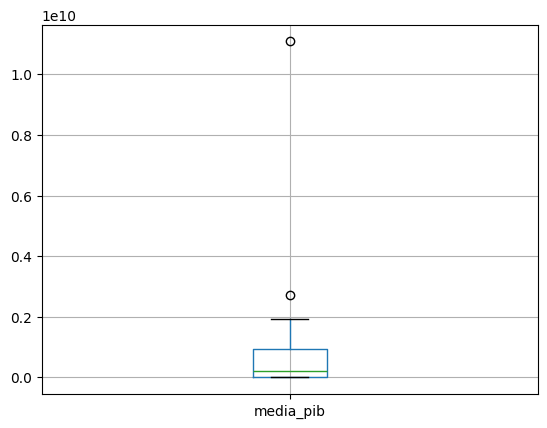

In [14]:
# estatísticas descritivas
dados_resumo = df_dados_paises.groupby('pais') \
                     .agg(media_pib = pd.NamedAgg('pib', 'median')) \
                     .reset_index()
# boxplot
dados_resumo[['media_pib']].boxplot()

In [26]:
brasil = df_dados_paises[df_dados_paises["pais"] == "Brasil"]
colunas = ["idh", "competitividade_indice"]

estatisticas_brasil = brasil[colunas].agg(['mean', 'median', 'min', 'max'])
estatisticas_brasil


,idh,competitividade_indice
mean,0.684653,49.568
median,0.686600,48.580
min,0.646400,39.980
max,0.718000,61.040


In [27]:
alemanha = df_dados_paises[df_dados_paises["pais"] == "Alemanha"]
estatisticas_alemanha = alemanha[colunas].agg(['mean', 'median', 'min', 'max'])
estatisticas_alemanha

# Diferença
comparacao = estatisticas_brasil - estatisticas_alemanha
comparacao


,idh,competitividade_indice
mean,-0.198227,-24.694667
median,-0.202200,-24.860000
min,-0.200200,-22.970000
max,-0.187000,-26.780000


Observa-se que o índice de IDH da Alemanha é consistentemente superior ao do Brasil em todos os anos analisados. Já o índice de competitividade apresenta variações menores, mas também favorece a Alemanha.